see https://cloud.google.com/bigquery/docs/visualize-jupyter

and in the browser https://console.cloud.google.com/bigquery?ws=&project=johannesvc

In [ ]:
!pip install google-cloud-bigquery[pandas]==2.34.1 --user
!pip install google-cloud-bigquery-storage
!pip install db-dtypes
!pip install matplotlib-inline 

  Using cached google_cloud_bigquery-2.34.1-py2.py3-none-any.whl (206 kB)


Also: option to use BigFrames: where bigquery holds and process dataframes

```py

!pip install bigframes


# @title Example 2: Query a table with BigQuery DataFrames
# With BigQuery DataFrames, you can use many familiar Pandas methods, but the
# processing happens BigQuery rather than the runtime, allowing you to work with larger
# DataFrames that would otherwise not fit in the runtime memory.
# Learn more here: https://cloud.google.com/python/docs/reference/bigframes/latest

import bigframes.pandas as bf

bf.options.bigquery.location = "us" #this variable is set based on the dataset you chose to query
bf.options.bigquery.project = "johannesvc" #this variable is set based on the dataset you chose to query

df = bf.read_gbq("bigquery-public-data.ml_datasets.penguins") #this example uses a penguin public dataset. Learn more here: https://console.cloud.google.com/bigquery?p=bigquery-public-data&d=ml_datasets&t=penguins&page=table&_ga=2.251359750.1031997792.1692116300-1119797950.1692116300

# BigFrames can work with tables that are too large to fit in the notebook memory.
# Look at the first 20 rows.
df.head(20)
```

In [1]:
%load_ext google.cloud.bigquery

The magic command % is equivalent to using the bigquery library directly:

In [6]:
from google.cloud import bigquery

client = bigquery.Client()

sql = """
SELECT
  bikes_count, name
FROM
  `bigquery-public-data.london_bicycles.cycle_stations`
ORDER BY
  bikes_count DESC
LIMIT 10
"""
bikes = client.query(sql).to_dataframe()

bikes.head()

,bikes_count,name
0,61,"Edgware Road Station, Marylebone"
1,45,"Gaywood Street, Elephant & Castle"
2,45,"Bankside Mix, Bankside"
3,45,"Ada Street, Hackney Central"
4,42,"Eagle Wharf Road, Hoxton"


In [2]:
%%bigquery bikes
SELECT
  bikes_count, name
FROM
  `bigquery-public-data.london_bicycles.cycle_stations`
ORDER BY
  bikes_count DESC
LIMIT 10

Query complete after 0.01s: 100%|██████████| 1/1 [00:00<00:00, 967.54query/s]


Downloading: 100%|██████████| 10/10 [00:00<00:00, 11.15rows/s]


<Axes: ylabel='name'>

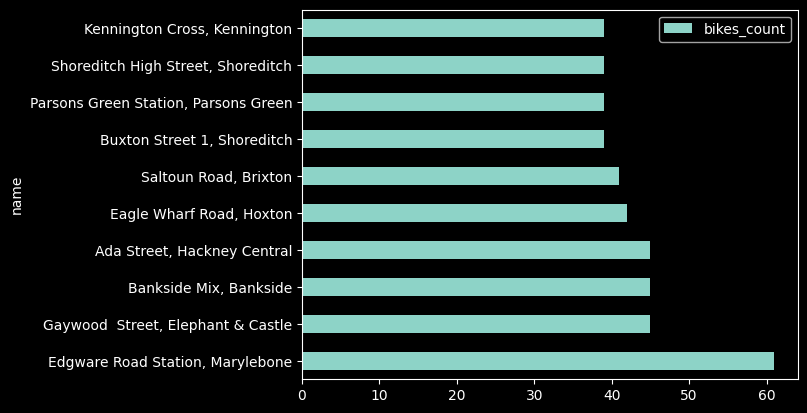

In [5]:
from pandas import DataFrame

bikes: DataFrame = bikes
bikes.plot(kind='barh', x='name', y='bikes_count')

In [ ]:
SELECT table_name, column_name, data_type
FROM `johannesvc.johannesvc.INFORMATION_SCHEMA.COLUMNS`
WHERE table_name = 'Olympics_dataset'  
-- ORDER BY table_name, column_name